In [2]:
# Import Necessary Modules
import glob
import matplotlib.pyplot as plt 
from skimage import io
import numpy as np
import math
%matplotlib inline 

In [3]:
#This function takes in two datasets (which must have the same number of
#columns), and reduces them down to a two-dimensional representation via
#Principal Component Analysis. It outputs the reduced datasets and
#generates a two-dimensional scatter plot.
def visualize2d(dataset0,dataset1):
    X = np.vstack((dataset0,dataset1))
    muX = np.mean(X, axis=0)
    sigmaX = np.cov(X, rowvar=False)
    D,V = np.linalg.eig(sigmaX)
    print(D)
    indices = np.argsort(D)  # find indices of eigenvalues in increasing order
    print(indices)
    rindices = np.flip(indices)  #reverse the indices so largest is first
    i = rindices[0]
    j = rindices[1]
    V2d = V[:,[i,j]]
    dataset0_2d = (dataset0 - muX)@V2d
    dataset1_2d = (dataset1 - muX)@V2d
    
    return dataset0_2d, dataset1_2d

In [4]:
# Part (a) Input the full benign and malignant data sets 
benign = np.genfromtxt("benignfull.csv", delimiter = ",")
malignant = np.genfromtxt("malignantfull.csv", delimiter = ",")

# a list of feature labels in the data 
feature_labels = ['average radius', 'average texture', 'average perimeter','average area','average smoothness',\
                  'average compactness','average concavity','concave points','symmetry','fractal dimension']

In [5]:
# part a: Compute the correlation coefficients for the benign data and find the most correlated two columns
rho = np.corrcoef(benign,rowvar=False)
max = -1
i = -1
j = -1
for row in range(len(rho)):
    for column in range(row):
        if max < rho[row,column] < 1:
            max = rho[row,column]
            i = row
            j = column
print(f"Most correlated columns are {i} and {j}, with corrcoef of {max}")

Most correlated columns are 2 and 0, with corrcoef of 0.9962653071430813


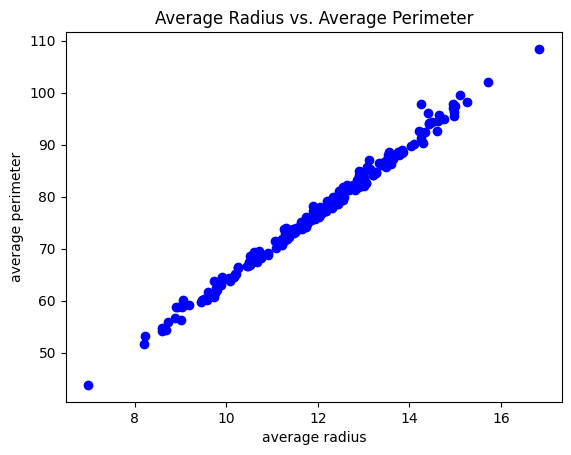

In [6]:
#part a continued: plot the two most correlated columns in a scatter plot 
fig = plt.figure()
plt.scatter(benign[:,0], benign[:,2], color='b')
plt.xlabel(feature_labels[0])
plt.ylabel(feature_labels[2])
plt.title('Average Radius vs. Average Perimeter')
plt.show()
fig.savefig('part_a.png')

In [7]:
#part b: find two least correlated benign columns
closest_to_zero = -1
i = -1
j = -1
for row in range(len(rho)):
    for column in range(row):
        if abs(rho[row,column]) < abs(closest_to_zero):
            closest_to_zero = rho[row,column]
            i = row
            j = column
print(f"Most correlated columns are {i} and {j}, with corrcoef of {closest_to_zero}")

Most correlated columns are 9 and 1, with corrcoef of -0.015046256037395721


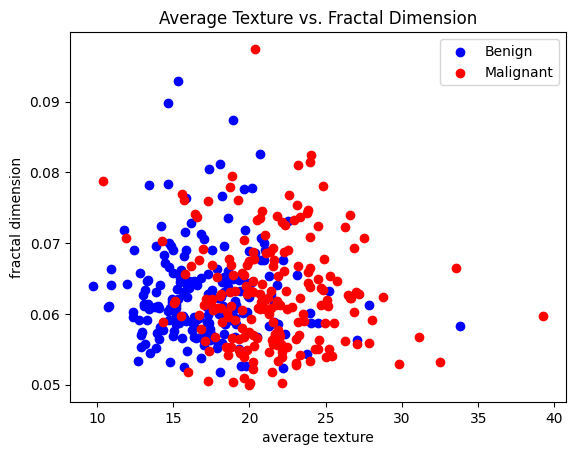

In [8]:
#part b: continued scatter plot the two least correlated columns for both the benign
# and the same two columns for the malignant data, in blue and red, respectively  
fig = plt.figure()
plt.scatter(benign[:,1], benign[:,9], color='b')
plt.scatter(malignant[:,1], malignant[:,9], color='r')
plt.xlabel(feature_labels[1])
plt.ylabel(feature_labels[9])
plt.legend(['Benign','Malignant'])
plt.title('Average Texture vs. Fractal Dimension')
plt.show()
fig.savefig('part_b.png')

[1.42239636e+05 2.00529642e+01 1.26388864e+01 6.01620384e-02
 1.31368852e-03 5.16583265e-04 2.12598615e-04 1.25148844e-04
 4.57321365e-05 8.01274914e-06]
[9 8 7 6 5 4 3 2 1 0]


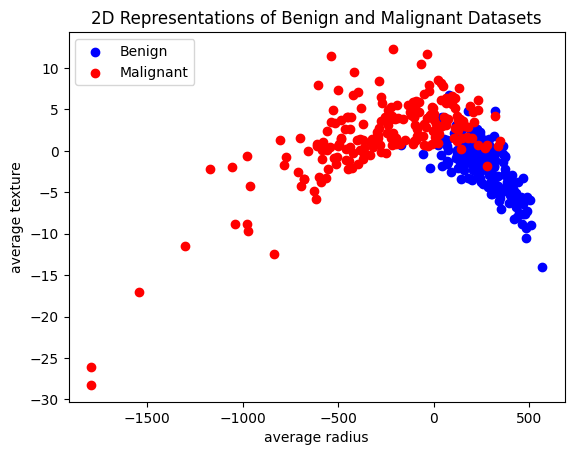

In [9]:
#part c.  Use the visualize2d function to compute the best two-dimensional approximation 
# to the combined benign, malignant data. Scatter plot the projected 2-D data for benign
# and malignant, in blue and red, respectively. 
[benign_2d, malignant_2d] = visualize2d(benign, malignant)
fig = plt.figure()
plt.scatter(benign_2d[:,0], benign_2d[:,1], color = 'b')
plt.scatter(malignant_2d[:,0], malignant_2d[:,1], color = 'r')
plt.xlabel(f'{feature_labels[0]}')
plt.ylabel(f'{feature_labels[1]}')
plt.legend(['Benign','Malignant'])
plt.title('2D Representations of Benign and Malignant Datasets')
plt.show()
fig.savefig('part_c.png')

[ 1.04255210e+06+0.00000000e+00j  3.00325392e+05+0.00000000e+00j
  2.61300493e+05+0.00000000e+00j  1.89505672e+05+0.00000000e+00j
  1.28246592e+05+0.00000000e+00j  1.07616164e+05+0.00000000e+00j
  7.80659135e+04+0.00000000e+00j  7.00075217e+04+0.00000000e+00j
  6.10139122e+04+0.00000000e+00j  5.21887694e+04+0.00000000e+00j
  4.98673289e+04+0.00000000e+00j  4.16480584e+04+0.00000000e+00j
  3.80099100e+04+0.00000000e+00j  3.78359739e+04+0.00000000e+00j
  3.62995210e+04+0.00000000e+00j  3.17421728e+04+0.00000000e+00j
  2.82924360e+04+0.00000000e+00j  2.59879822e+04+0.00000000e+00j
  2.50008327e+04+0.00000000e+00j  2.32241400e+04+0.00000000e+00j
  2.15140379e+04+0.00000000e+00j  2.05361704e+04+0.00000000e+00j
  1.95421217e+04+0.00000000e+00j  1.91521904e+04+0.00000000e+00j
  1.81084192e+04+0.00000000e+00j  1.73982877e+04+0.00000000e+00j
  1.58474860e+04+0.00000000e+00j  1.44209270e+04+0.00000000e+00j
  1.38368697e+04+0.00000000e+00j  1.22973088e+04+0.00000000e+00j
  1.22998392e+04+0.000000

c:\Users\Jilin\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Jilin\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


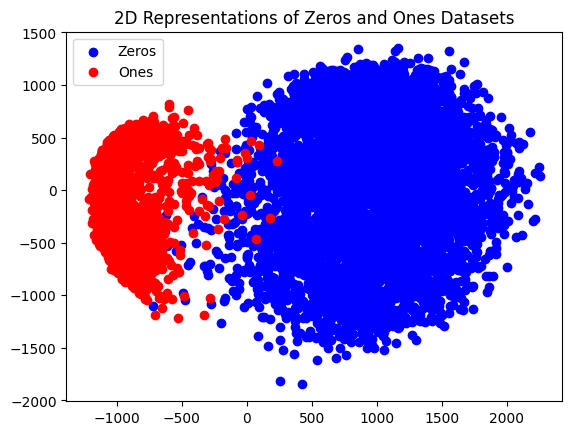

In [12]:
#part d) Use the visualize2d function to compute the best two-dimensional approximation 
# to the MNIST zeros-ones data.  Scatter plot the projected 2-D data for Zeros and Ones, 
# with zeros in blue and ones in red. 
zeros = np.genfromtxt('MNISTzeros.csv', delimiter = ",")
ones = np.genfromtxt('MNISTones.csv', delimiter = ",")
[zeros_2d, ones_2d] = visualize2d(zeros, ones)
print(zeros_2d.shape)
print(ones_2d.shape)
fig = plt.figure()
plt.scatter(zeros_2d[:,0], zeros_2d[:,1], color = 'b')
plt.scatter(ones_2d[:,0], ones_2d[:,1], color = 'r')
plt.legend(['Zeros','Ones'])
plt.title('2D Representations of Zeros and Ones Datasets')
plt.show()
fig.savefig('part_d.png')